In [ ]:
"""You have to run flowers_init once before this code can be executed"""

In [1]:
import time
import numpy as np
import pandas as pd
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator
#import matplotlib
import matplotlib.pyplot as plt
import pickle
#from sklearn.metrics import confusion_matrix
import os
from keras import optimizers
#import itertools
#from keras.optimizers import SGD, Adam, RMSprop, Nadam
import tensorflow as tf
import keras
from keras.callbacks import Callback
startTime = time.time()
threads = 12
config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': threads}) 
config.gpu_options.allow_growth = True
config.gpu_options.per_process_gpu_memory_fraction = 1.0
sess = tf.Session(config=config) 
keras.backend.set_session(sess)
print("---------------------------------------------------------------")
from tensorflow.python.client import device_lib 
print(device_lib.list_local_devices())

Using TensorFlow backend.


---------------------------------------------------------------
[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 506302989542490070
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11811160064
locality {
  bus_id: 1
  links {
  }
}
incarnation: 12465330600267420525
physical_device_desc: "device: 0, name: GeForce GTX 1080 Ti, pci bus id: 0000:0a:00.0, compute capability: 6.1"
]


In [2]:
np.random.seed(1)

In [3]:
train_images = pickle.load(open("train_images.pkl", "rb"))
val_images = pickle.load(open("val_images.pkl", "rb"))
test_images = pickle.load(open("test_images.pkl", "rb"))

In [4]:
base_dir = 'flowers_split'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))      
#softmax for the five clases
#sigmoid for binary classes

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [8]:
train_generator = train_datagen.flow_from_directory(train_dir, # This is the target directory 
                                                        target_size=(150, 150), # All images will be resized to 150x150 
                                                        batch_size=batch_size, 
                                                        class_mode='categorical') 

Found 2593 images belonging to 5 classes.


In [9]:
validation_generator = val_datagen.flow_from_directory(validation_dir, 
                                                           target_size=(150, 150), 
                                                           batch_size=batch_size, 
                                                           class_mode='categorical')

Found 865 images belonging to 5 classes.


In [10]:
history = model.fit_generator(train_generator,
                                  steps_per_epoch=len(train_images)//batch_size,
                                  epochs=30,
                                  validation_data=validation_generator,
                                  validation_steps=len(val_images)//batch_size,
                                  use_multiprocessing=False,
                                  workers=int(threads/2)-1
                                  )#verbose=0)

#use_multprocessing enables the cpu to do the data generator preprocessing on multiple cores before 
#the data is sent to the gpu. If this is not enabled it is possible that the cpu becomes the bottleneck and
#not the gpu.

Epoch 1/30
129/129 [==============================] - 5s 38ms/step - loss: 1.4356 - acc: 0.3845 - val_loss: 1.0730 - val_acc: 0.5326
Epoch 2/30
129/129 [==============================] - 2s 19ms/step - loss: 1.1022 - acc: 0.5680 - val_loss: 1.0217 - val_acc: 0.5976
Epoch 3/30
129/129 [==============================] - 2s 18ms/step - loss: 0.9757 - acc: 0.6270 - val_loss: 0.8707 - val_acc: 0.6544
Epoch 4/30
129/129 [==============================] - 2s 18ms/step - loss: 0.8541 - acc: 0.6778 - val_loss: 0.8975 - val_acc: 0.6604
Epoch 5/30
129/129 [==============================] - 2s 19ms/step - loss: 0.7454 - acc: 0.7232 - val_loss: 0.9786 - val_acc: 0.6379
Epoch 6/30
129/129 [==============================] - 2s 18ms/step - loss: 0.6102 - acc: 0.7790 - val_loss: 0.9584 - val_acc: 0.6462
Epoch 7/30
129/129 [==============================] - 2s 18ms/step - loss: 0.4888 - acc: 0.8215 - val_loss: 1.1970 - val_acc: 0.6757
Epoch 8/30
129/129 [==============================] - 2s 18ms/step - 

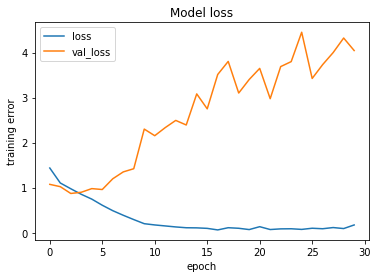

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('training error')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc=0)
plt.show()

In [12]:
"""Save train loss"""
#plt.savefig('image_gen_train_loss.png', bbox_inches='tight')

'Save train loss'

In [13]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

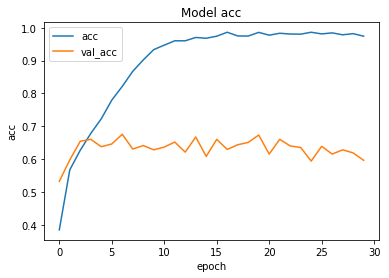

In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['acc', 'val_acc'], loc=0)
plt.show()

In [15]:
"""Save train accuracy"""
#plt.savefig('image_gen_train_acc.png', bbox_inches='tight')

'Save train accuracy'

In [16]:
"""TEST SET"""

'TEST SET'

In [17]:
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=batch_size,
                                                        shuffle=False,
                                                        class_mode='categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=500, verbose=1)
print('test acc:', test_acc)

Found 865 images belonging to 5 classes.
500/500 [==============================] - 12s 25ms/step
test acc: 0.6313167255604758


In [18]:
def create_list(arr_arr):
    new_arr = []
    for x in arr_arr:
        index = 0
        for i in x:
            if i > 0:
                new_arr.append(index)
                break
            index += 1
    return new_arr

In [19]:
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                        target_size=(150, 150), 
                                                        batch_size=batch_size,
                                                        shuffle=False,
                                                        class_mode='categorical')

pred_result = model.predict_generator(test_generator,
                                 steps=len(test_images)//batch_size,
                                 verbose=1)

Found 865 images belonging to 5 classes.
43/43 [==============================] - 1s 25ms/step


In [20]:
labels=['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical')

correct_result = []
count = 0
leng = len(pred_result)/batch_size
print(leng)
for x, y in test_generator:
    correct_result.extend(create_list(y))
    count+=1
    if count > leng: #leng
        break

Found 865 images belonging to 5 classes.
43.0


In [21]:
df = pd.DataFrame(np.zeros((5, 5)),index=labels , columns=labels)

In [22]:
c = 0
for i in range(0, len(pred_result[:,0])): 
        maxV = 0
        j = 0
        
        for j in range(0, len(pred_result[0,:])):
            if pred_result[i,j] > maxV:
                maxV = pred_result[i,j]
                maxIndex = j
        c +=1
        df.iloc[maxIndex,correct_result[i]] +=1
print(c)

860


In [23]:
print("confusion matrix: rows are predictions, columns are the correct answers")
print(df)

confusion matrix: rows are predictions, columns are the correct answers
           daisy  dandelion  rose  sunflower  tulip
daisy       77.0       29.0  10.0        9.0   13.0
dandelion    9.0      135.0   3.0       17.0    7.0
rose        14.0       20.0  88.0       12.0   27.0
sunflower    7.0       16.0   3.0       98.0    7.0
tulip       20.0       21.0  51.0       22.0  145.0


In [24]:
endTime = time.time()
print(endTime - startTime)

556.3689475059509
